<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/nlp/NLP_Tokenization_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://kaggle.com/kernels/welcome?src=https://github.com/mayait/ClaseAnalisisDatos/blob/main/nlp/NLP_Tokenization_Sentiment_Analysis.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" width=120 /></a>

<a href="https://github.com/mayait/ClaseAnalisisDatos/blob/main/nlp/NLP_Tokenization_Sentiment_Analysis.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width=120 /></a>

In [1]:
#@title Nombre del estudiante
Estudiante = "" #@param {type:"string"}
Código = "" #@param {type:"string"}

# NLP Procesamiento Natural de Lenguaje






*   Empecemos desde donde quedamos en el ultimo ejercicio, importemos el archivo de Excel que exportaste con un listado de Tweets.
* Asegurate que la columna con los tweets se llama **Tweet_Text**



In [2]:
#!pip install wordcloud
import re
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

import pandas as pd
from collections import Counter
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianmaya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df = pd.read_excel('tweets_ecuador.xlsx')
df.head()

,Unnamed: 0,id,text,created_at,source,retweets,replies,likes,quote_count
0,0,1.645860e+18,CONFIRMAMOS A ECUADOR..HASTA EL MOMENTO NADIE ...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.645860e+18,@JMilei mis mejores deseos y te sigo como arge...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.645860e+18,No te pierdas la fase final de la #CONMEBOL Su...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.645860e+18,@LaRed_Ecuador Salí ganador de una entrada par...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.645860e+18,"Animales, criminales que siguen aterrizando a ...",NaN,NaN,NaN,NaN,NaN,NaN


-----

**Pasemos todo a minusculas**



In [7]:
df['Tweet_Text'] = df['text']
df['Tweet_Text'] = df['Tweet_Text'].str.lower()

In [8]:
df.head()

,Unnamed: 0,id,text,created_at,source,retweets,replies,likes,quote_count,Tweet_Text
0,0,1.645860e+18,CONFIRMAMOS A ECUADOR..HASTA EL MOMENTO NADIE ...,NaN,NaN,NaN,NaN,NaN,NaN,confirmamos a ecuador..hasta el momento nadie ...
1,1,1.645860e+18,@JMilei mis mejores deseos y te sigo como arge...,NaN,NaN,NaN,NaN,NaN,NaN,@jmilei mis mejores deseos y te sigo como arge...
2,2,1.645860e+18,No te pierdas la fase final de la #CONMEBOL Su...,NaN,NaN,NaN,NaN,NaN,NaN,no te pierdas la fase final de la #conmebol su...
3,3,1.645860e+18,@LaRed_Ecuador Salí ganador de una entrada par...,NaN,NaN,NaN,NaN,NaN,NaN,@lared_ecuador salí ganador de una entrada par...
4,4,1.645860e+18,"Animales, criminales que siguen aterrizando a ...",NaN,NaN,NaN,NaN,NaN,NaN,"animales, criminales que siguen aterrizando a ..."


----


# **Tokenizar**
En NLP el proceso de convertir las palabras o párrafos en inputs para la computadora se llama tokenización. Se puede pensar al token como la unidad para procesamiento semántico, es decir palabras.

## Tokenización con NLTK
El kit de herramientas de lenguaje natural, o más comúnmente NLTK, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural (PLN) simbólico y estadísticos para el lenguaje de programación Python. NLTK incluye demostraciones gráficas y datos de muestra.

*Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.*
[nltk.org](https://nltk.org/)

**NLTK tiene librerias que permiten tokenizar, veamos la diferencia entre ellas**

TreeBankTokenizer es perfecto en partir el texto, sin embargo no es bueno con Tweets, quita información como hashtags y menciones.


NLTK proporciona una amplia variedad de herramientas y recursos para el procesamiento de texto en lenguaje natural, incluyendo tokenización, etiquetado POS, análisis de sentimientos, extracción de entidades, análisis de dependencias, entre otras. También ofrece una gran cantidad de corpus de texto, como el corpus de noticias Reuters, el corpus de opinión de películas, entre otros, que se pueden utilizar para entrenar modelos de procesamiento de lenguaje natural.

Además, NLTK es fácil de usar y cuenta con una documentación detallada y ejemplos de código que ayudan a los usuarios a entender cómo utilizar las diferentes herramientas y recursos de la librería.

En resumen, NLTK es una librería de procesamiento del lenguaje natural muy útil y popular que ofrece una amplia variedad de herramientas y recursos para el procesamiento de texto en lenguaje natural en Python.

In [9]:
import nltk
from nltk.tokenize import WordPunctTokenizer 
from nltk.tokenize import TreebankWordTokenizer 

texto = "¿Cuánto tiempo pasó desde que comí una manzana?"
tweet = ' #Oscar a Mejor Película Internacional; 😩😔😁 un filme ecuatoriano figura en la lista » https://t.co/cb5p6eX3DZ https://t.co/kQ0nVAbyOn'

print(WordPunctTokenizer().tokenize(texto))
print(WordPunctTokenizer().tokenize(tweet))
print(TreebankWordTokenizer().tokenize(tweet))
print(WordPunctTokenizer().tokenize(tweet))


['¿', 'Cuánto', 'tiempo', 'pasó', 'desde', 'que', 'comí', 'una', 'manzana', '?']
['#', 'Oscar', 'a', 'Mejor', 'Película', 'Internacional', ';', '😩😔😁', 'un', 'filme', 'ecuatoriano', 'figura', 'en', 'la', 'lista', '»', 'https', '://', 't', '.', 'co', '/', 'cb5p6eX3DZ', 'https', '://', 't', '.', 'co', '/', 'kQ0nVAbyOn']
['#', 'Oscar', 'a', 'Mejor', 'Película', 'Internacional', ';', '😩😔😁', 'un', 'filme', 'ecuatoriano', 'figura', 'en', 'la', 'lista', '»', 'https', ':', '//t.co/cb5p6eX3DZ', 'https', ':', '//t.co/kQ0nVAbyOn']
['#', 'Oscar', 'a', 'Mejor', 'Película', 'Internacional', ';', '😩😔😁', 'un', 'filme', 'ecuatoriano', 'figura', 'en', 'la', 'lista', '»', 'https', '://', 't', '.', 'co', '/', 'cb5p6eX3DZ', 'https', '://', 't', '.', 'co', '/', 'kQ0nVAbyOn']


## NLTK Tweet Tokenizer

Por suerte NLTK ya tiene una libreria que soluciona este problema y tokeniza manteniendo emoticonos, menciones y hashtags

In [10]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

tweet = ' #Oscar a Mejor Película Internacional; 😩😔😁 un filme ecuatoriano figura en la lista » https://t.co/cb5p6eX3DZ https://t.co/kQ0nVAbyOn'
tweet_tokenizer.tokenize(tweet)

['#Oscar',
 'a',
 'Mejor',
 'Película',
 'Internacional',
 ';',
 '😩',
 '😔',
 '😁',
 'un',
 'filme',
 'ecuatoriano',
 'figura',
 'en',
 'la',
 'lista',
 '»',
 'https://t.co/cb5p6eX3DZ',
 'https://t.co/kQ0nVAbyOn']

# Creamos una lista de palabras y sus frecuencias

In [11]:
import nltk
from collections import Counter
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# Una lista para todas las palabras
palabras_todas = []

# Creamos un contador de frecuencias
count_all = Counter()

for tweet in df["Tweet_Text"]:
  # Crear una lista de todos los terminos con NLTK
  terms_all = tweet_tokenizer.tokenize(tweet)
  # Actualizar el contador
  count_all.update(terms_all)
  # Aumentar al listado de todas las palabras
  palabras_todas.extend(terms_all)

# Las primeras 10 palabras más comunes
print("Cantidad de terminos unicos: ", len(count_all))
print("Total de terminos (incluye repetidos): ", len(palabras_todas))
count_all.most_common(20)

Cantidad de terminos unicos:  36689
Total de terminos (incluye repetidos):  303527


[('de', 11807),
 (',', 9788),
 ('.', 8017),
 ('en', 7661),
 ('ecuador', 7353),
 ('la', 6876),
 ('el', 6703),
 ('y', 6078),
 ('que', 5856),
 ('a', 5162),
 ('no', 3046),
 ('los', 2855),
 ('del', 2827),
 ('es', 2497),
 ('por', 2237),
 ('se', 2205),
 ('!', 2141),
 ('para', 2130),
 ('con', 1980),
 ('un', 1980)]

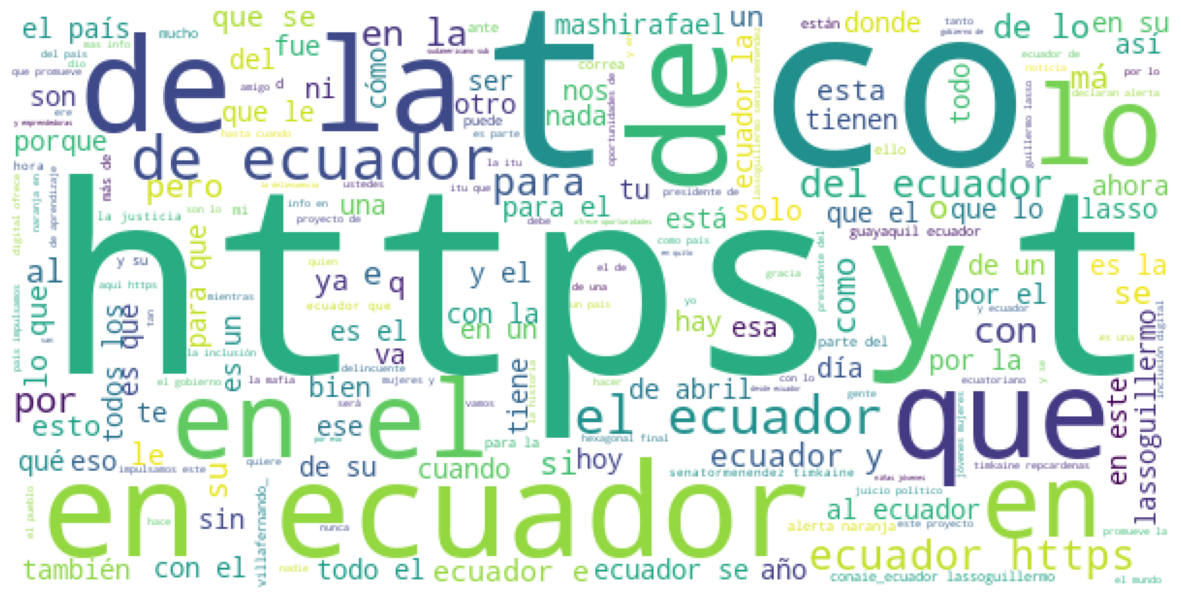

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(palabras_todas)
wordcloud = WordCloud(width = 600, height = 300, background_color="white",).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_polluted"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Quitar StopWords o Palabras Vacias

Si vemos en el ejercicio anterior, hay muchas palabras con frecuencias altas que no nos dicen nada, estas son palabras vacias o Stopwords.

Las palabras vacías son aquellas palabras en lenguaje natural que tienen muy poco significado, como «es», «una», «el», etc. 

Las palabras vacías a menudo se eliminan del texto antes de entrenar los modelos de aprendizaje profundo y de Machine Learning, ya que las palabras vacías ocurren en abundancia, por lo que brindan poca o ninguna información única que se pueda usar para la clasificación o agrupación.

[Palabras Vacias Wikipedia](https://es.wikipedia.org/wiki/Palabra_vac%C3%ADa)

NLTK tiene un listado de palabras vacias en ingles y español, pero tambien podemos añadir las nuestras.

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

otros_a_quitar = ['»', ';', ',', '.','!','?','¿',',','rt', 'via' ]
 
punctuation = list(string.punctuation)
stop = stopwords.words('spanish') + stopwords.words('english') + punctuation
print(stop)
print('Total de stop words: ', len(stop))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianmaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Listas de frecuencias
count_stop = Counter()
count_hash = Counter()
count_mentions = Counter()
count_terms_only = Counter()

# Listas de palabras
lista_todas = []
lista_hash = []
lista_mentions = []
lista_terms_only = []

for tweet in df["Tweet_Text"]:

  # Crear una lista de todos los terminos que no están en el stop
  terms_stop = [term for term in tweet_tokenizer.tokenize(tweet) if term not in stop]
  # Actualizar el contador
  count_stop.update(terms_stop)
  # Actualizar la lista
  lista_todas.extend(terms_stop)

  # Contar hashtags
  terms_hash = [term for term in tweet_tokenizer.tokenize(tweet) if term.startswith('#')]
  # Actualizar el contador
  count_hash.update(terms_hash)
  # Actualizar la lista
  lista_hash.extend(terms_hash)

  # Contar menciones
  terms_mentions = [term for term in tweet_tokenizer.tokenize(tweet) if term.startswith('@')]
  # Actualizar el contador
  count_mentions.update(terms_mentions)
  # Actualizar la lista
  lista_mentions.extend(terms_mentions)

  # Contar terms sin hash ni menciones
  terms_only = [term for term in tweet_tokenizer.tokenize(tweet) if term not in stop and not term.startswith(('#', '@', 'http'))]
  # Actualizar el contador
  count_terms_only.update(terms_only)
  # Actualizar la lista
  lista_terms_only.extend(terms_only)

print(count_stop.most_common(20))
print(count_hash.most_common(20))
print(count_terms_only.most_common(20))
print(count_mentions.most_common(20))

[('ecuador', 7353), ('#ecuador', 1899), ('...', 932), ('país', 889), ('🇪🇨', 873), ('️', 858), ('si', 804), ('@lassoguillermo', 801), ('q', 536), ('..', 498), ('lasso', 484), ('presidente', 444), ('¡', 441), ('solo', 406), ('¿', 405), ('@mashirafael', 369), ('gobierno', 338), ('ser', 337), ('aquí', 321), ('años', 307)]
[('#ecuador', 1899), ('#guayaquil', 201), ('#quito', 195), ('#corruptos', 142), ('#chile', 134), ('#argentina', 104), ('#venezuela', 104), ('#colombia', 102), ('#americasgirlscancode', 96), ('#cuenca', 95), ('#mexico', 94), ('#', 85), ('#delincuentes', 80), ('#crimenorganizado', 78), ('#reunion', 77), ('#parejasswinger', 77), ('#sábado', 77), ('#abril2023', 77), ('#prohibidoolvidar', 76), ('#gobierno', 75)]
[('ecuador', 7353), ('...', 932), ('país', 889), ('🇪🇨', 873), ('️', 858), ('si', 804), ('q', 536), ('..', 498), ('lasso', 484), ('presidente', 444), ('¡', 441), ('solo', 406), ('¿', 405), ('gobierno', 338), ('ser', 337), ('aquí', 321), ('años', 307), ('hoy', 299), ('vs

# WordCloud

Una nube de palabras o nube de etiquetas es una representación visual de las palabras que conforman un texto, en donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

Uno de sus usos principales es la visualización de las etiquetas de un sitio web, de modo que los temas más frecuentes en el sitio se muestren con mayor prominencia. 

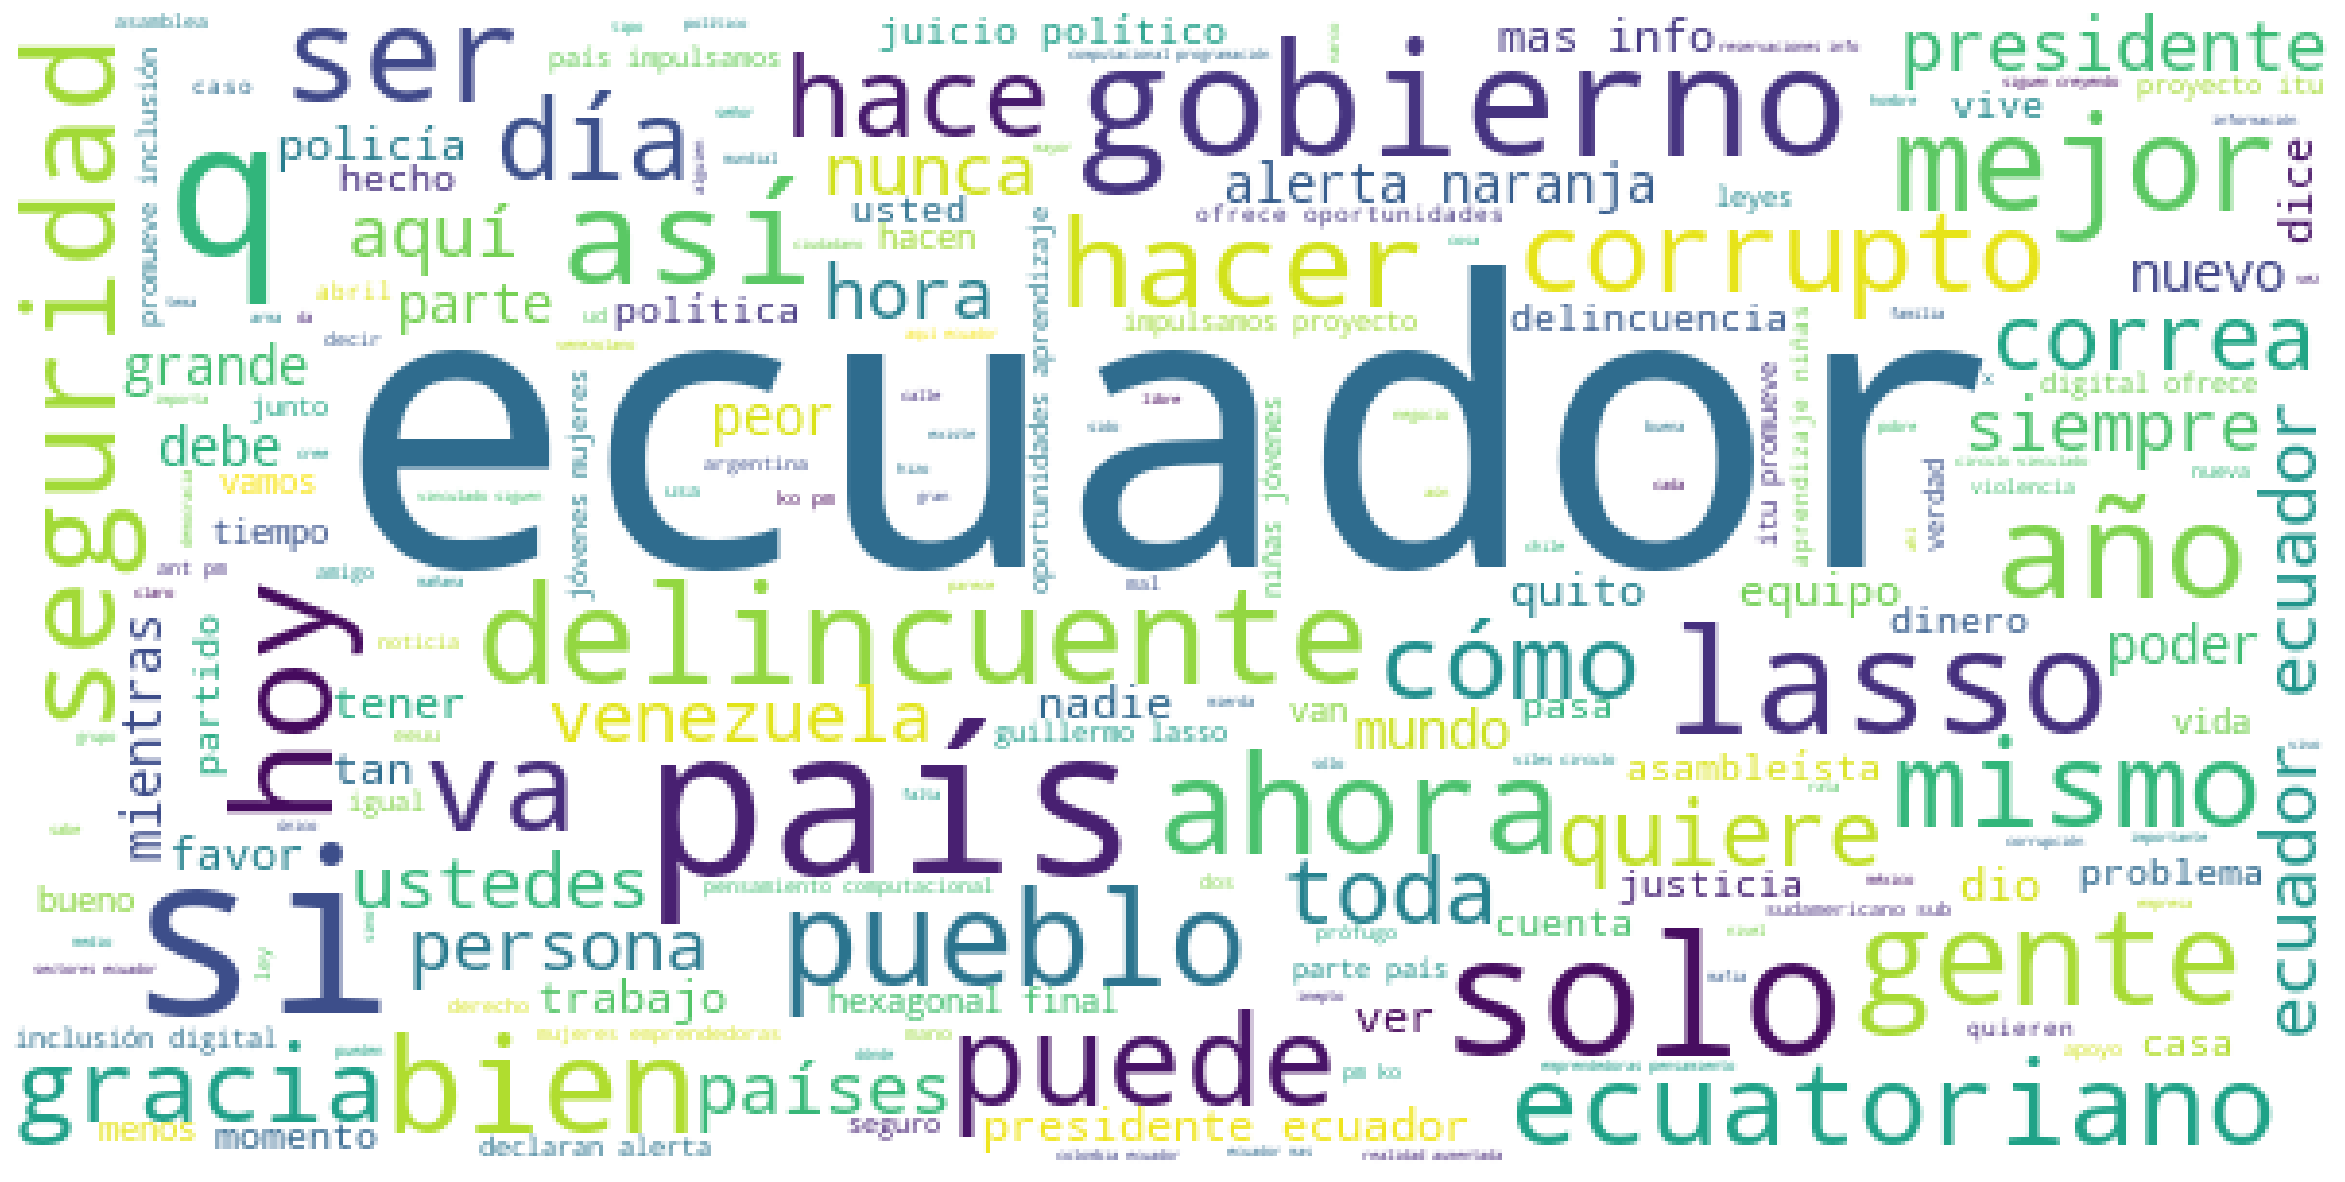

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(lista_terms_only)
wordcloud = WordCloud(width = 600, height = 300, background_color="white",).generate(unique_string)
plt.figure(figsize=(30,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

# WordCloud con Mascara

Python nos permite componer un wordcloud usando una imagen como mascara, asegurate de buscar una foto con fondo blanco.
**No olvides subir la imagen spiderman_mask.jpg junto al cuaderno.**

In [16]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests
import matplotlib.pyplot as plt

unique_string=(" ").join(lista_terms_only)

# Utilizar una imagen del internet como mascara
#url_imagen_original = "https://i.pinimg.com/originals/80/7b/29/807b29f756cc47621f92b3581e263272.jpg"
#mask = np.array(Image.open( requests.get(urlimagen_original, stream=True).raw ))

# Abrir una imagen de mascara local
mask = np.array(Image.open("spiderman_mask.jpg") )

wordcloud_por = WordCloud(background_color="white", max_words=5000, mask=mask).generate(unique_string)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


# store to file
plt.savefig("spiderman_wordcloud.png", format="png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'spiderman_mask.jpg'

# Exportar listas a Excel para análisis posterior

**Creamos una función para exportar la lista de frecuencias de palabras a Excel**

In [17]:
def counter_to_excel(counter, filename):
  palabras = []
  for i in counter.items():
    palabras.append([i[0],i[1]])
  pd.DataFrame(palabras).to_excel(filename, header=False, index=False)
  return None

Extraer la data a excel para procesarla


In [18]:
counter_to_excel(count_stop, "count_stop.xlsx")
counter_to_excel(count_hash, "count_hash.xlsx")
counter_to_excel(count_terms_only, "count_terms_only.xlsx")
counter_to_excel(count_mentions, "count_mentions.xlsx")

pd.DataFrame(lista_todas).to_excel('lista_todas.xlsx', header=False, index=False)
pd.DataFrame(lista_hash).to_excel('lista_hash.xlsx', header=False, index=False)
pd.DataFrame(lista_mentions).to_excel('lista_mentions.xlsx', header=False, index=False)
pd.DataFrame(lista_terms_only).to_excel('lista_terms_only.xlsx', header=False, index=False)

# Análisis de sentimiento
![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/0cc39c70021d21fc0d2fd7a986ccd242bef86c29/6-Figure1-1.png)

In [19]:
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

def visualise_sentiments_from_sentence(sentence):
  visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
  })

## NLTK Vader

(Valence Aware Dictionary and sEntiment Reasoner) es un módulo de análisis de sentimientos en el procesamiento del lenguaje natural (NLP) desarrollado como parte de la librería NLTK (Natural Language Toolkit) en Python.

El módulo de análisis de sentimientos de NLTK Vader utiliza un diccionario de palabras que ha sido previamente etiquetado según su polaridad (positiva, negativa o neutra) y su intensidad. Utilizando esta información, NLTK Vader asigna una puntuación de sentimiento a un texto de entrada en función de la cantidad de palabras positivas, negativas y neutras en el texto, así como de su intensidad.

NLTK Vader es útil en la clasificación automática de textos según su polaridad, y es especialmente adecuado para su uso en textos cortos, como comentarios de redes sociales o reseñas de productos. Además, NLTK Vader es fácil de usar y puede proporcionar una puntuación de sentimiento de texto en cuestión de segundos.

In [20]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/julianmaya/nltk_data...


In [21]:
sentence = "i really like you but you can be so dumb some times"

In [22]:
sid.polarity_scores(sentence)

{'neg': 0.35, 'neu': 0.537, 'pos': 0.113, 'compound': -0.7154}

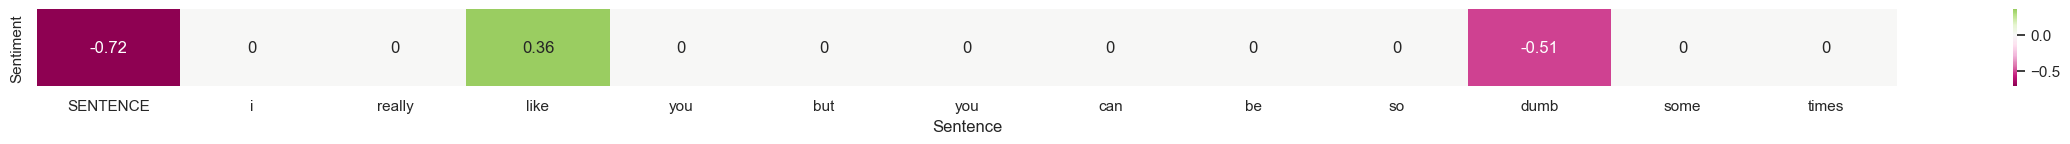

In [23]:
visualise_sentiments_from_sentence(sentence)

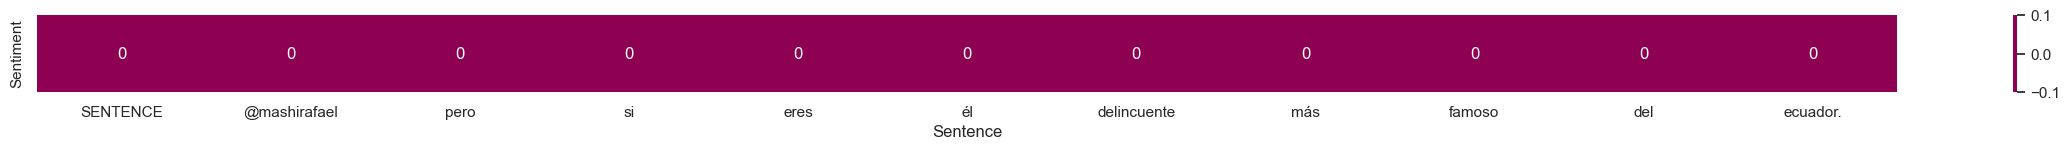

In [24]:
# Que pasa si le pasamos texto en español
visualise_sentiments_from_sentence(tweet)

# Traducir
Casi todos los módelos de Analisis de sentimiento funcionan en Ingles, una solución es traducir.

In [25]:
!pip install -q spanish-sentiment-analysis
!pip install -q googletrans==3.1.0a0

In [26]:
from googletrans import Translator
from time import sleep

def traducir(text, dest='en', **kwargs):
    translator = Translator()
    result = None
    while result == None:
        try:
            result = translator.translate(text,**kwargs)
        except Exception as e:
            print(e)
            translator = Translator()
            sleep(0.5)
            pass
    return result.text.lower()

In [27]:
english_tweet = traducir(tweet)
print('ES', tweet)
print('ES', english_tweet)

ES @mashirafael pero si eres  él delincuente  más famoso  del ecuador.
ES @mashirafael but you are the most famous criminal in ecuador.


In [28]:
sid.polarity_scores(tweet)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

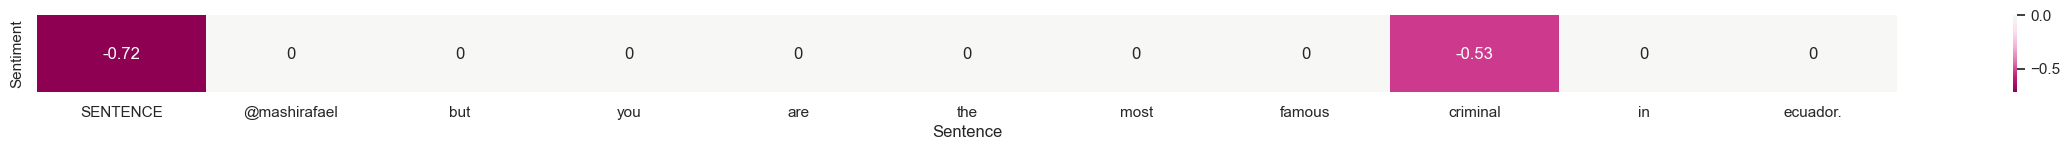

In [29]:
visualise_sentiments_from_sentence(english_tweet)

***Hagamos un ejemplo más claro***

In [30]:
tweet_negativo = "@claroECUA son la peor operadora del mundo, ojalá se quiebren pronto y dejen de estafar a las personas"

In [31]:
sid.polarity_scores(tweet_negativo)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

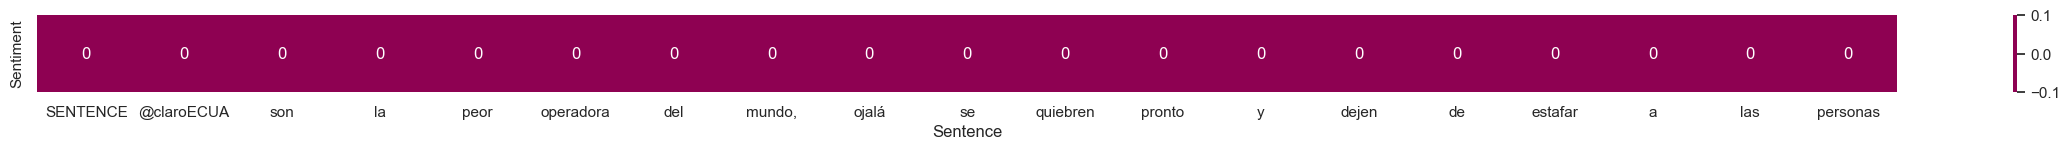

In [32]:
visualise_sentiments_from_sentence(tweet_negativo)

In [33]:
negative_tweet = traducir(tweet_negativo)
negative_tweet

'@claroecua they are the worst operator in the world, i hope they go bankrupt soon and stop scamming people'

In [34]:
sid.polarity_scores(negative_tweet)

{'neg': 0.369, 'neu': 0.522, 'pos': 0.108, 'compound': -0.7906}

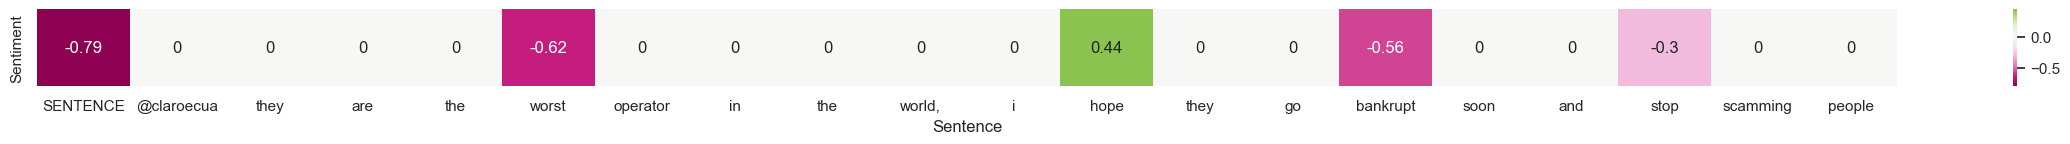

In [35]:
visualise_sentiments_from_sentence(negative_tweet)

In [36]:
small = df.sample(5)
small

,Unnamed: 0,id,text,created_at,source,retweets,replies,likes,quote_count,Tweet_Text
3379,3379,1.645768e+18,@Expresoec A ecuavisa le esperan unas lindas p...,NaN,NaN,NaN,NaN,NaN,NaN,@expresoec a ecuavisa le esperan unas lindas p...
5590,5590,1.645607e+18,"Defensa del presidente de Ecuador, pide amplia...",NaN,NaN,NaN,NaN,NaN,NaN,"defensa del presidente de ecuador, pide amplia..."
7305,7305,1.645548e+18,Liga contra Barcelona aglutina a las hinchadas...,NaN,NaN,NaN,NaN,NaN,NaN,liga contra barcelona aglutina a las hinchadas...
3658,3658,1.645757e+18,"EE. UU., China y la UE dinamizan la apertura c...",NaN,NaN,NaN,NaN,NaN,NaN,"ee. uu., china y la ue dinamizan la apertura c..."
7202,7202,1.645552e+18,La Asamblea Nacional de Ecuador está conformad...,NaN,NaN,NaN,NaN,NaN,NaN,la asamblea nacional de ecuador está conformad...


In [37]:
df['tweet_traducido'] = df.Tweet_Text.apply(traducir)

In [ ]:
df

In [ ]:
df.tweet_traducido.apply(sid.polarity_scores)

Creamos una función para obtener solo el valor compound de la polaridad y añadirlo a una columna del dataframe.

In [ ]:
def get_polarity_score_compound(text):
    return sid.polarity_scores(text)['compound']

In [ ]:
df['sentimiento'] = df.tweet_traducido.apply( get_polarity_score_compound )

In [ ]:
df.sentimiento.hist()

# Ejercicio

## 1. 
Importa un excel con un listado de Tweets en inglés y almacenalos en un dataframe llamado df_tuits.
Utiliza el cuaderno de [scrapping en twitter](https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/nlp/2022_Twitter_Data_Scrapper.ipynb)

In [ ]:
# df_tuits = pd.read_excel...

## 2.
¿Cúales son las palabras más comunes de esa busqueda?
Elabora una nube de palabras

## 3.
- Utilizando tuits descargados en ingles
- ¿Cuantos tuits son posittivos?
- ¿Cuantos son negativos?
- Cúal es el sentimiento de la conversación

## 4. Elabora un histograma del sentimiento de los tuits

# 5. Crea una presentación con el resultado de los tuits de la marca
